In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from oneVar import newton_raphson
from scipy.optimize import newton

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 1.3 Método de Newton Raphson

### 1.3.1 Explicación del método

1. **Obtener la primera derivada de la función $f(x)$**

- Como se muestra en la figura, $f'(x)$ es equivalente a la pendiente de la función $f(x)$.

$$f'(x) = \frac{f(x_i) - 0}{x_i - x_{i+1}}$$



2. **Aplicar de forma iterativa la fórmula del método**


$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$$


-  Si $f(x_m) < \varepsilon_s$ (Tolerancia):
    - Entonces la raíz $x_r$, es aproximadamente igual a $x_{i+1}$.
    - $x_r \approx x_{i+1}$.

<center>

<img src="figures/images/newtonRaphson01.png" style="height:200px" title="Método no acotado">

***Figura 01. Esquema gráfico del método de Newton-Raphson para encontrar la raíz de una función de una variable $f(x)$.***

</center>

### 1.3.2 Implementación del método

Se utiliza la implementación del algoritmo de punto fijo escrita en la función `fixed_point1()` dentro del archivo `oneVar.py`.

In [4]:
help(newton_raphson)

Help on function newton_raphson in module oneVar:

newton_raphson(f, fp, xi, lamb=1.0, tol=None, niter=10)
    Basic bisection algorithm for finding the root of a one-variable equation
    
    Parameters
    ----------
    f : function
        Python function returning a number.  `f` must be continuous.
    fp : function
        Python function returning a number. `fp` must be continuous.
        `fp` is the derivative of `f`.
    xi : scalar
        initial guess for root.
    lamb : scalar
        relaxation factor
    tol : scalar
        tolerance of the method, [0, 1]
    niter : int
        maximum number of iterations of the method.
        Default value is 100.
    
    Returns
    -------
    m : float
        value of xm (midpoint) at the last iteration.
    n: float
        number of iterations of the method



#### Ejemplo: Función exponencial

In [5]:
# función a evaluar y fórmula para la raíz
f = lambda x: np.exp(-x) - x
fp = lambda x: -1.*np.exp(-x) - 1
# valor inicial
l, u = -2, 2
x0 = 0
# numero de iteraciones
niter = 5

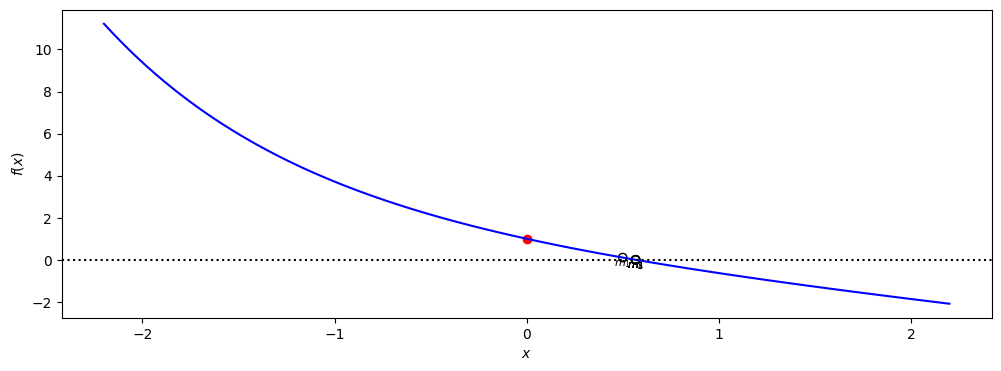

In [7]:
# Gráfico ilustrativo del método
fig, ax = plt.subplots(figsize=(12, 4))

# gráfico de la función
x = np.linspace(1.1*l, 1.1*u, 100)
ax.plot(x, f(x), color='b')
ax.scatter(x0, f(x0), color='r')
ax.axhline(0, ls=':', color='k')
ax.set(xlabel=r'$x$', ylabel=r'$f(x)$')

# lista con resultados
for its in range(1,niter+1):
    m, n = newton_raphson(f, fp, xi=x0, lamb=1.0, tol=None, niter=its)
    ax.scatter(m, f(m), color='k', facecolor="None")
    ax.text(m, f(m), r"$m_{:d}$".format(n), fontsize=8,
            ha='center', va='top')

**Preguntas**: 

- ¿Tras cuántas iteraciones se obtiene una estimación aceptable de $x_r$?

- ¿Cuál es el efecto de especificar un criterio de convergencia más estricto sobre el número de iteraciones?

In [8]:
# lista con resultados
tols = np.logspace(0, -12, 13)
print(" its  tol       x         abs(f(x))")
for tol in tols:
    m, n = newton_raphson(f, fp, xi=0, lamb=1, tol=tol, niter=100)
    print(f"{n:4d}, {tol:.2e}, {m:.6f}, {abs(f(m)):12.6e}")

 its  tol       x         abs(f(x))
   1, 1.00e+00, 0.500000, 1.065307e-01
   2, 1.00e-01, 0.566311, 1.304510e-03
   2, 1.00e-02, 0.566311, 1.304510e-03
   3, 1.00e-03, 0.567143, 1.964805e-07
   3, 1.00e-04, 0.567143, 1.964805e-07
   3, 1.00e-05, 0.567143, 1.964805e-07
   3, 1.00e-06, 0.567143, 1.964805e-07
   4, 1.00e-07, 0.567143, 4.440892e-15
   4, 1.00e-08, 0.567143, 4.440892e-15
   4, 1.00e-09, 0.567143, 4.440892e-15
   4, 1.00e-10, 0.567143, 4.440892e-15
   4, 1.00e-11, 0.567143, 4.440892e-15
   4, 1.00e-12, 0.567143, 4.440892e-15


#### Ejemplo: Función trigonométrica

In [9]:
# función a evaluar
f = lambda x: np.sin(x)
fp = lambda x: np.cos(x)
# intervalo para acotar
l, u = -2, 2
x0 = 0.5
# numero de iteraciones
niter = 5

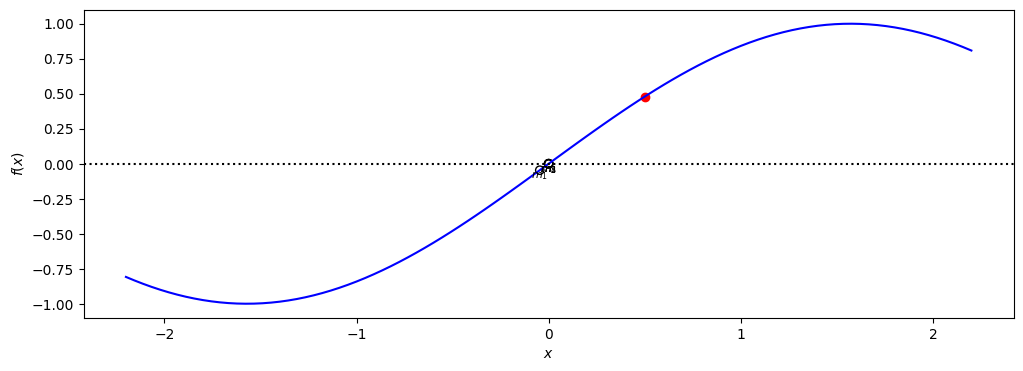

In [10]:
# Gráfico ilustrativo del método
fig, ax = plt.subplots(figsize=(12, 4))

# gráfico de la función
x = np.linspace(1.1*l, 1.1*u, 100)
ax.plot(x, f(x), color='b')
ax.scatter(x0, f(x0), color='r')
ax.axhline(0, ls=':', color='k')
ax.set(xlabel=r'$x$', ylabel=r'$f(x)$')

# lista con resultados
for its in range(1,niter+1):
    m, n = newton_raphson(f, fp, xi=x0, lamb=1.0, tol=None, niter=its)
    ax.scatter(m, f(m), color='k', facecolor="None")
    ax.text(m, f(m), r"$m_{:d}$".format(n), fontsize=8,
            ha='center', va='top')

**Preguntas**: 

- ¿Qué sucede cuando se modifica el intervalo de acotamiento para encontrar la raíz?

- ¿Por qué es necesario implementar un criterio de convergencia al algorítmo de bisección?

In [11]:
# lista con resultados
tols = np.logspace(0, -12, 13)
print(" its  tol       x         abs(f(x))")
for tol in tols:
    m, n = newton_raphson(f, fp, xi=x0, lamb=1, tol=tol, niter=100)
    print(f"{n:4d}, {tol:.2e}, {m:.6f}, {abs(f(m)):12.6e}")

 its  tol       x         abs(f(x))
   1, 1.00e+00, -0.046302, 4.628595e-02
   1, 1.00e-01, -0.046302, 4.628595e-02
   2, 1.00e-02, 0.000033, 3.311802e-05
   2, 1.00e-03, 0.000033, 3.311802e-05
   2, 1.00e-04, 0.000033, 3.311802e-05
   3, 1.00e-05, -0.000000, 1.210798e-14
   3, 1.00e-06, -0.000000, 1.210798e-14
   3, 1.00e-07, -0.000000, 1.210798e-14
   3, 1.00e-08, -0.000000, 1.210798e-14
   3, 1.00e-09, -0.000000, 1.210798e-14
   3, 1.00e-10, -0.000000, 1.210798e-14
   3, 1.00e-11, -0.000000, 1.210798e-14
   3, 1.00e-12, -0.000000, 1.210798e-14


### 1.3.3 Utilización del método de Newton-Raphson implementado en `scipy`

In [12]:
help(newton)

Help on function newton in module scipy.optimize._zeros_py:

newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)
    Find a root of a real or complex function using the Newton-Raphson
    (or secant or Halley's) method.
    
    Find a root of the scalar-valued function `func` given a nearby scalar
    starting point `x0`.
    The Newton-Raphson method is used if the derivative `fprime` of `func`
    is provided, otherwise the secant method is used. If the second order
    derivative `fprime2` of `func` is also provided, then Halley's method is
    used.
    
    If `x0` is a sequence with more than one item, `newton` returns an array:
    the roots of the function from each (scalar) starting point in `x0`.
    In this case, `func` must be vectorized to return a sequence or array of
    the same shape as its first argument. If `fprime` (`fprime2`) is given,
    then its return must also have the same shape: eac

#### Ejemplo: Función exponencial

In [13]:
# función a evaluar y fórmula para la raíz
f = lambda x: np.exp(-x) - x
fp = lambda x: -1.*np.exp(-x) - 1
# valor inicial
x0 = 0
# numero de iteraciones
tol = 1e-8

# cálculo de raíz por el método de bisección
xr = newton(func=f, x0=x0, fprime=fp, tol=tol)
print(f"x={xr}, f(x)={f(xr)}")

x=0.567143290409784, f(x)=-1.1102230246251565e-16


#### Ejemplo: Función trigonométrica

In [14]:
# función a evaluar
f = lambda x: np.sin(x)
fp = lambda x: np.cos(x)
# valor inicial
x0 = 0.5
# numero de iteraciones
tol = 1e-8

# cálculo de raíz por el método de bisección
xr = newton(func=f, x0=x0, fprime=fp, tol=tol)
print(f"x={xr}, f(x)={f(xr)}")

x=0.0, f(x)=0.0


#### Ejemplo: Ecuación cúbica de tercer grado (parametrizada)

In [ ]:
def f(x, a, b, c, d):
    return a*(x)**3 + b*(x)**2 + c*x + d

In [ ]:
def fp(x, a, b, c, d):
    return 3*a*(x)**2 + 2*b*(x) + c

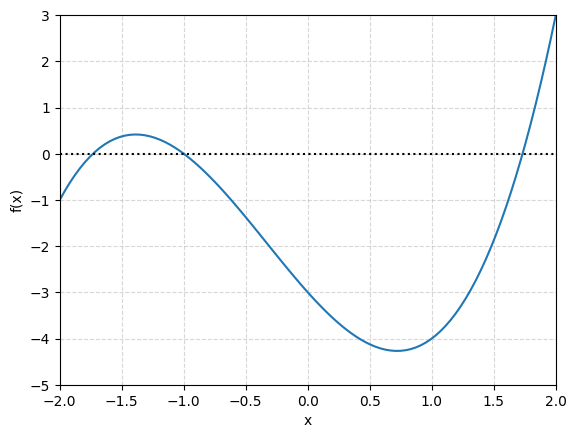

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(-2, 2, 100)
a, b, c, d = 1, 1, -3, -3
y = f(x, a, b, c, d)

ax.plot(x, y)
ax.axhline(0, ls=':', color='k')
ax.grid(ls='--', alpha=0.5)
ax.set(xlim=(-2, 2), ylim=(-5, 3), xlabel='x', ylabel='f(x)')
plt.show()

**Preguntas**:

- Gráficamente se observa que la ecuación tiene tres raíces. Encuéntrelas mediante el método de bisección.


In [ ]:
# valor inicial
x0 = -2
# numero de iteraciones
tol = 1e-8

# cálculo de raíz por el método de bisección
xr = newton(func=f, x0=x0, fprime=fp, args=(a,b,c,d), tol=tol)
print(f"x={xr}, f(x)={f(xr, a, b, c, d)}")

x=-1.7320508075688774, f(x)=-4.440892098500626e-16


In [ ]:
# valor inicial
x0 = 0
# numero de iteraciones
tol = 1e-8

# cálculo de raíz por el método de bisección
xr = newton(func=f, x0=x0, fprime=fp, args=(a,b,c,d), tol=tol)
print(f"x={xr}, f(x)={f(xr, a, b, c, d)}")

x=-1.0, f(x)=0.0


In [ ]:
# valor inicial
x0 = 2
# numero de iteraciones
tol = 1e-8

# cálculo de raíz por el método de bisección
xr = newton(func=f, x0=x0, fprime=fp, args=(a,b,c,d), tol=tol)
print(f"x={xr}, f(x)={f(xr, a, b, c, d)}")

x=1.7320508075688774, f(x)=1.7763568394002505e-15
